In [25]:
import train
from model import CSRNet
import density_preprocess
import torch.nn as nn
import torch
import torchvision
import os
import glob

import matplotlib.pyplot as plt
import numpy as np

In [7]:
data_path = '../Dataset/Cells'
data = []
for img in glob.glob(os.path.join(data_path, '*dots.png')):
    data.append(img)

In [8]:
model = CSRNet()

In [9]:
criterion = nn.MSELoss(size_average=False).cuda()

lr = 1e-7
momentum = 0.95
decay = 5*1e-4
optimizer = torch.optim.SGD(model.parameters(), lr,
                            momentum=momentum,
                            weight_decay=decay)


In [10]:
transform = torchvision.transforms.Compose([
                       torchvision.transforms.ToTensor(),
                       torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])


data = torchvision.datasets.ImageFolder(root=data_path, transform=transform)

In [11]:
train_loader = torch.utils.data.DataLoader(data, batch_size= 1, shuffle = True, drop_last= True)

In [ ]:
model.train()

In [12]:
dataiter = iter(train_loader)

In [13]:
dataiter

In [14]:
images, labels = dataiter.next()

In [18]:
labels

tensor([0])

In [16]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

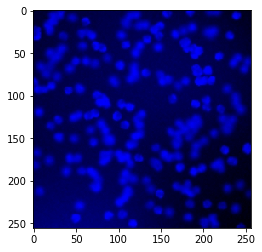

In [17]:
imshow(torchvision.utils.make_grid(images))

In [26]:
counts = density_preprocess.get_total_cell_counts('../Dataset/Dots')

AttributeError: module 'density_preprocess' has no attribute 'get_total_cell_counts'

In [24]:
counts

[135,
 233,
 82,
 86,
 96,
 143,
 169,
 122,
 168,
 115,
 117,
 301,
 78,
 146,
 155,
 199,
 223,
 195,
 197,
 183,
 158,
 200,
 168,
 241,
 315,
 112,
 196,
 111,
 255,
 97,
 190,
 197,
 136,
 137,
 142,
 238,
 212,
 198,
 228,
 178,
 223,
 280,
 126,
 208,
 225,
 129,
 117,
 89,
 159,
 206,
 192,
 162,
 122,
 198,
 181,
 83,
 206,
 250,
 103,
 241,
 93,
 154,
 202,
 212,
 242,
 186,
 255,
 111,
 155,
 219,
 191,
 230,
 173,
 314,
 244,
 218,
 278,
 251,
 179,
 258,
 104,
 187,
 264,
 100,
 269,
 192,
 175,
 164,
 168,
 145,
 96,
 214,
 231,
 121,
 295,
 78,
 199,
 207,
 112,
 207,
 104,
 257,
 254,
 102,
 147,
 116,
 156,
 306,
 134,
 139,
 194,
 221,
 126,
 130,
 242,
 193,
 220,
 252,
 211,
 92,
 237,
 108,
 200,
 277,
 120,
 144,
 90,
 162,
 190,
 134,
 160,
 174,
 92,
 198,
 244,
 188,
 208,
 74,
 306,
 129,
 267,
 111,
 177,
 260,
 217,
 98,
 100,
 140,
 142,
 308,
 119,
 197,
 257,
 210,
 74,
 317,
 98,
 119,
 133,
 174,
 215,
 297,
 176,
 235,
 202,
 145,
 110,
 96,
 162,
 159